In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the data
df = pd.read_csv("Wholesale_customers_data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.shape # checking the dimension of the data

(440, 8)

In [4]:
df.count().isna() #Checking for any missing data

Channel             False
Region              False
Fresh               False
Milk                False
Grocery             False
Frozen              False
Detergents_Paper    False
Delicassen          False
dtype: bool

In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
df["Channel"].unique() # checking for the uniqueness of the class

array([2, 1], dtype=int64)

In [7]:
df["Region"].unique()

array([3, 1, 2], dtype=int64)

In [8]:
# Determining the channels
df[df["Channel"] == 1].count()

Channel             298
Region              298
Fresh               298
Milk                298
Grocery             298
Frozen              298
Detergents_Paper    298
Delicassen          298
dtype: int64

In [9]:
df[df["Channel"] == 2].count()

Channel             142
Region              142
Fresh               142
Milk                142
Grocery             142
Frozen              142
Detergents_Paper    142
Delicassen          142
dtype: int64

In [10]:
# From the data description 1 = Horeca (Hotel/Restaurant/cafe) and 2 = Retail.
# Hotel/Restaurant/cafe self more goods

### Main EDA questions
##### 1. Which item incurs the highest client expenditure?
##### 2. Which region has the highest dispersion of client?
##### 3. Which channel do incur more clients expenditure?
##### 4. What are the top ten annual average expenditure?
##### 5. Which region appear more in the top ten?

In [11]:
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


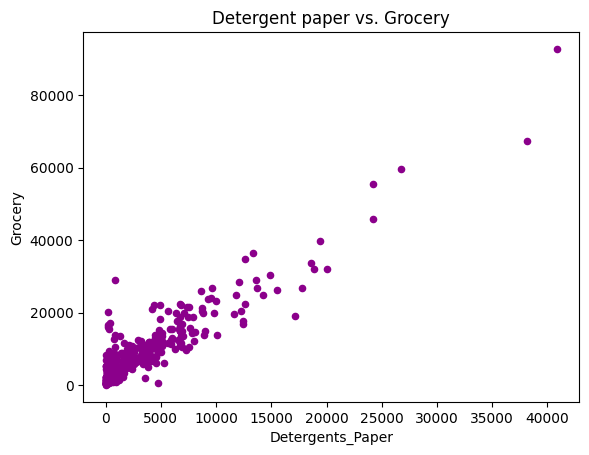

In [12]:
df.plot(
    kind="scatter",
    x="Detergents_Paper",
    y="Grocery",
    color="darkmagenta",
    title="Detergent paper vs. Grocery"
)
plt.show()

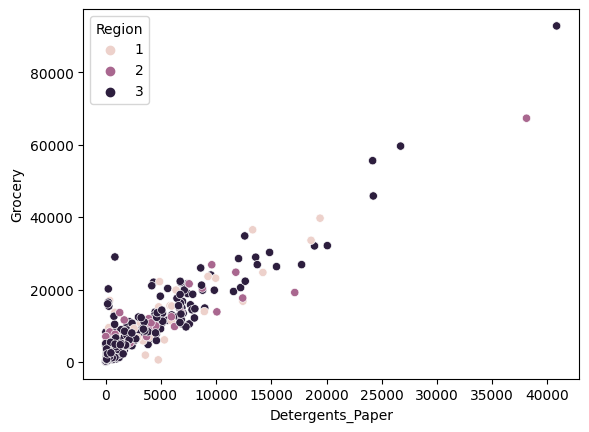

In [13]:
sns.scatterplot(
    x="Detergents_Paper",
    y="Grocery",
    data=df,
    hue="Region"
)
plt.show()

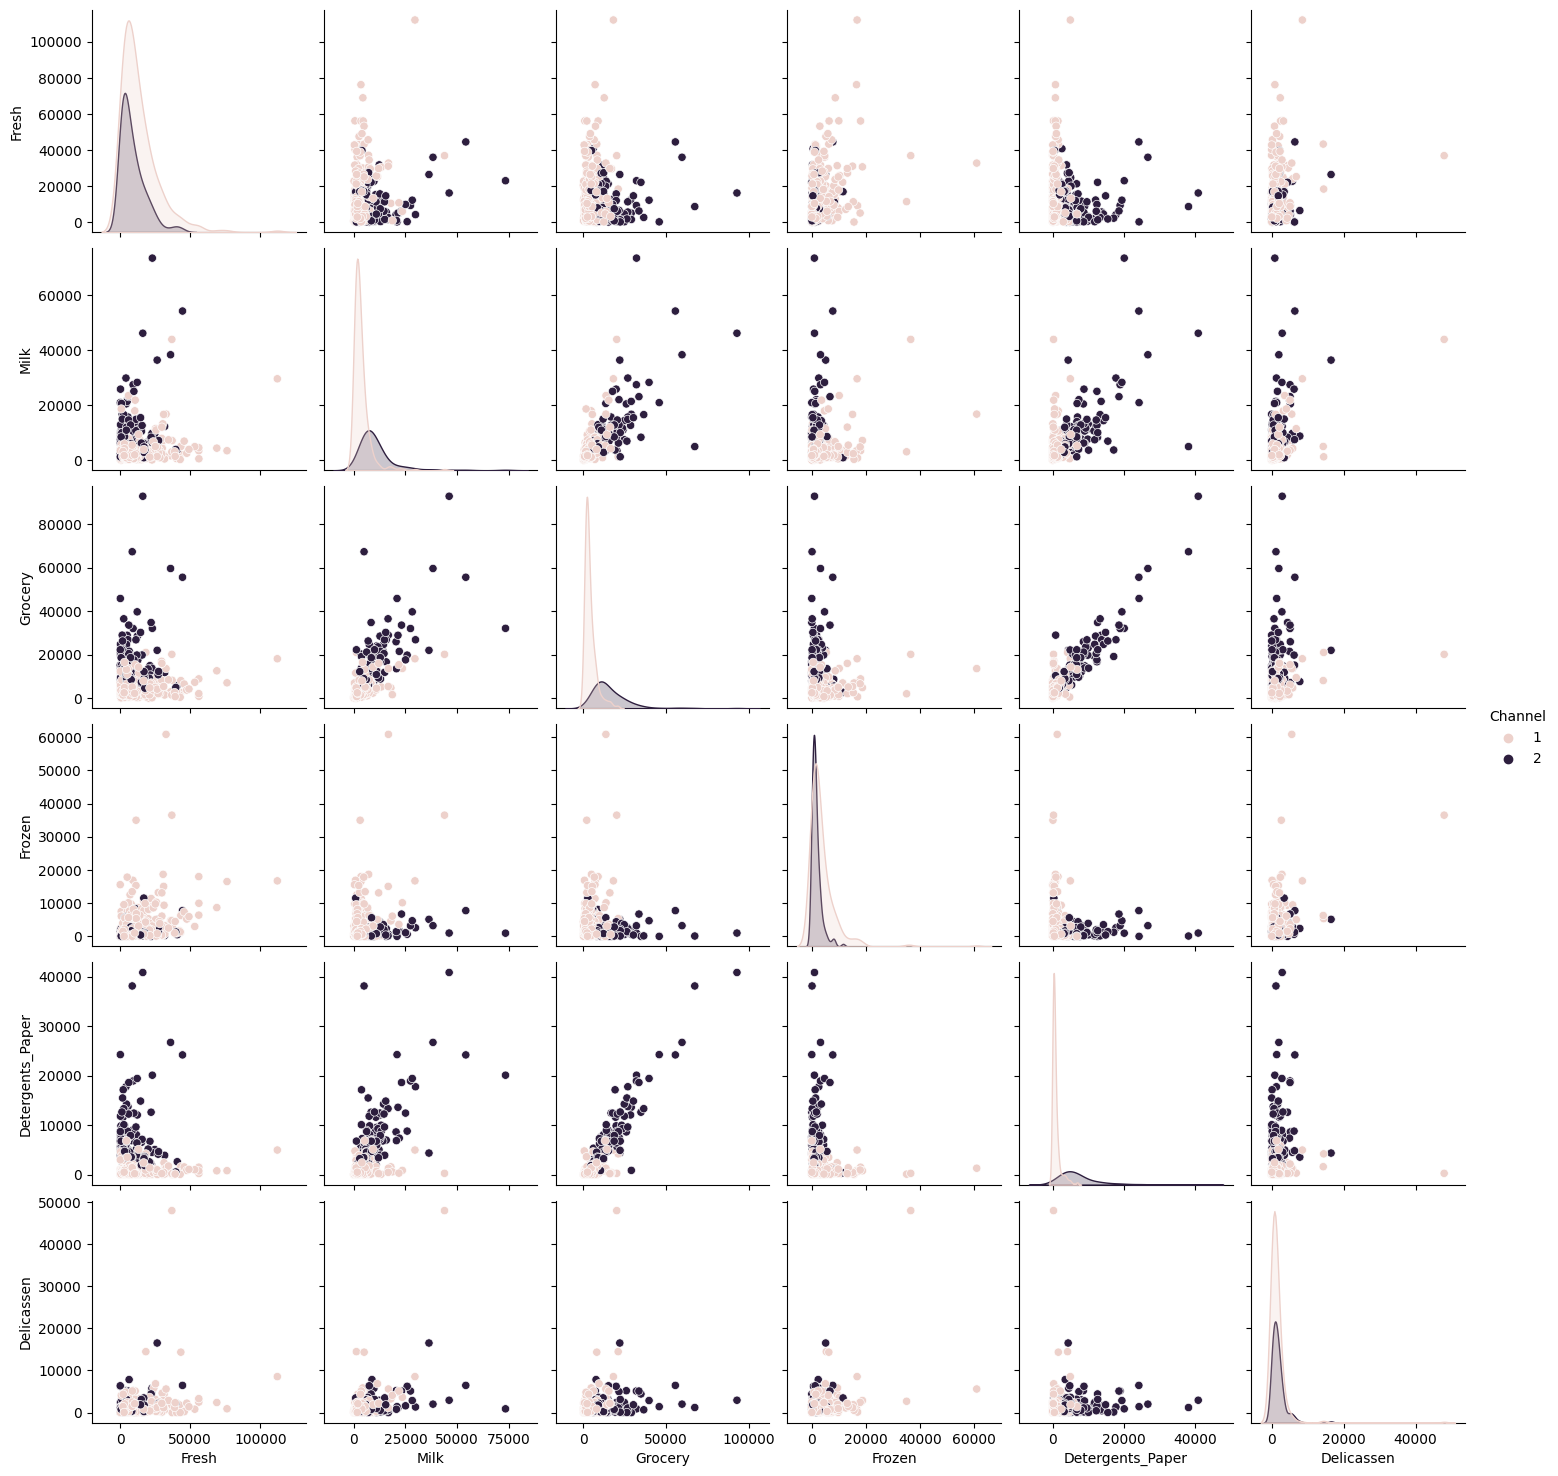

In [14]:
sns.pairplot(
    df,
    vars=[
        "Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"
    ],
    hue="Channel"
)
plt.show()

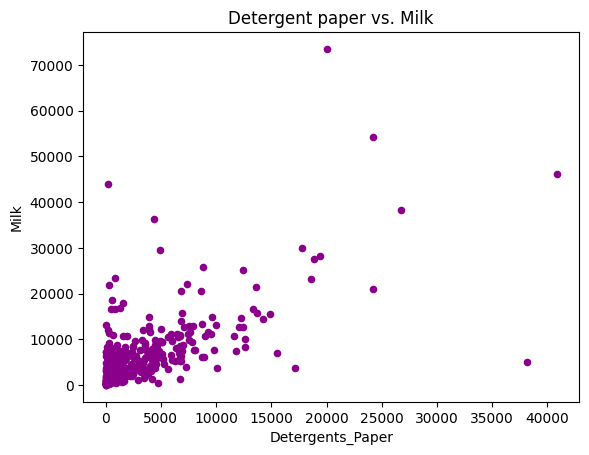

In [15]:
df.plot(
    kind="scatter",
    x="Detergents_Paper",
    y="Milk",
    color="darkmagenta",
    title="Detergent paper vs. Milk"
)
plt.show()

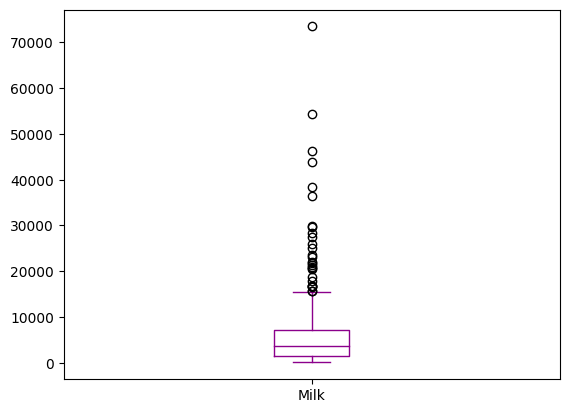

In [16]:
df.plot(kind="box", x="Detergents_Paper", y="Milk", color="darkmagenta")
plt.show()

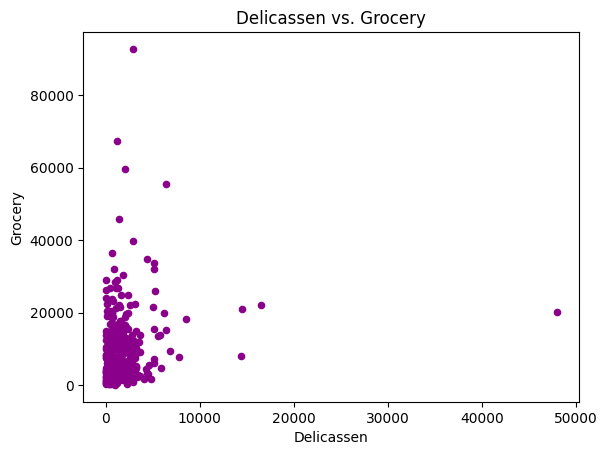

In [17]:
df.plot(
    kind="scatter",
    x="Delicassen",
    y="Grocery", 
    color="darkmagenta",
    title="Delicassen vs. Grocery"
)
plt.show()

In [18]:
df_totals = pd.DataFrame(df.sum()[2:], columns=["total"]).transpose()
df_totals

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
total,5280131,2550357,3498562,1351650,1267857,670943


In [19]:
df_totals.shape


(1, 6)

##### 1. Which item incurs the highest client expenditure?
###### What percentage?

In [20]:
df_totals

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
total,5280131,2550357,3498562,1351650,1267857,670943


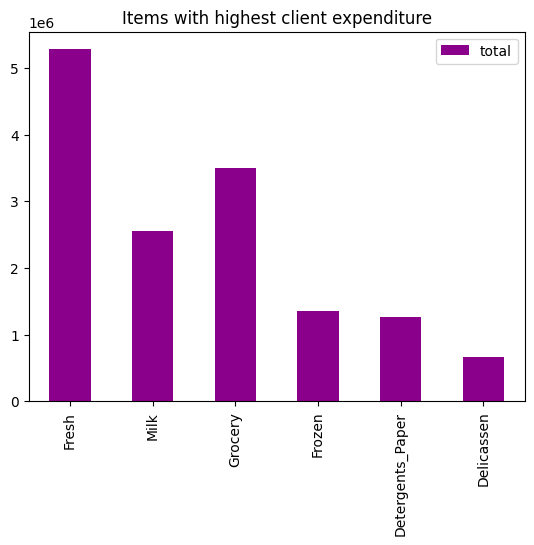

In [21]:
#plotting a bar chart to determine the items that incur most expenditure
ax = df_totals.iloc[0].plot(kind="bar", color="darkmagenta", title="Items with highest client expenditure")
ax.legend()
plt.show()

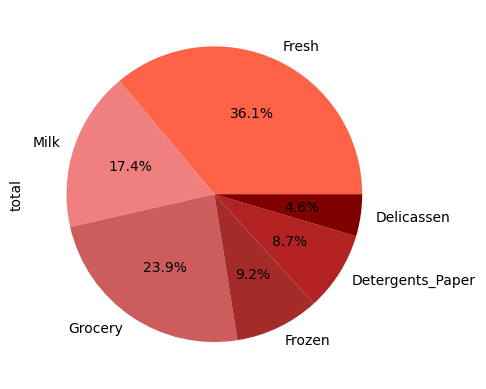

In [22]:
# plotting a pie vhart to determine the percentage
df_totals.iloc[0].plot(kind="pie", autopct="%1.1f%%", colors=["tomato", 'lightcoral', 'indianred', 'brown', 'firebrick', 'maroon'])
plt.show()

In [23]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


##### 2. Which region has the highest dispersion of client?

In [24]:
df["Region"].value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

##### Lisbon 77 -> 2
##### Oporto 47 -> 1
##### Other Region 316 -> 3

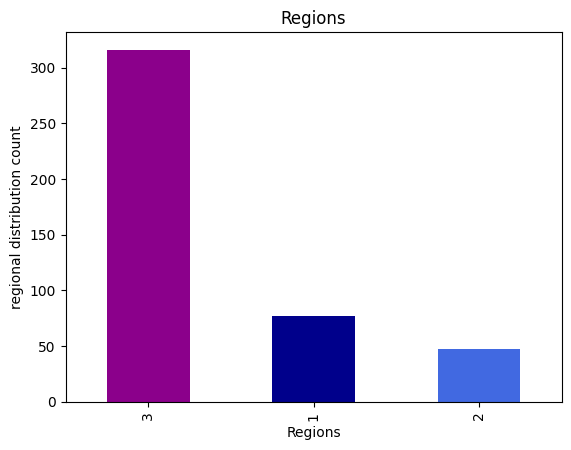

In [25]:
# plotting a bar chart to  show the region with the most number of customers
ax = df["Region"].value_counts().plot(kind="bar", title="Regions", color=["darkmagenta", "darkblue", "royalblue"])
ax.set_xlabel("Regions")
ax.set_ylabel("regional distribution count")
plt.show()

##### 3. Which channel do incur more clients expenditure?
#####    1 -> Horeca (Hotel/Restaurant/cafe)
#####    2 -> Retail

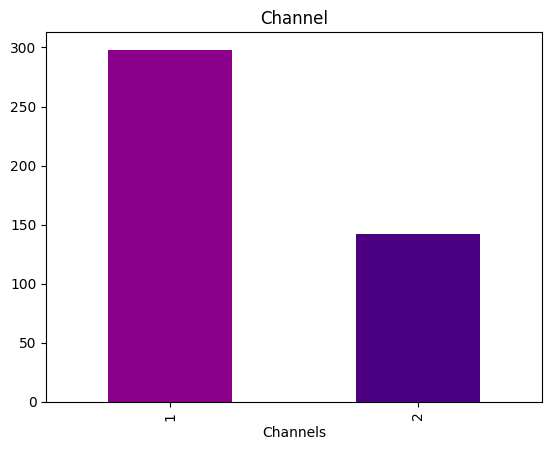

In [26]:
# plotting a bar chart that shows the statistics of the customers' expenditure based on the channel
ax = df["Channel"].value_counts().plot(kind="bar", title="Channel", color=["darkmagenta", "indigo"])
ax.set_xlabel("Channels")
plt.show()

##### 4. What are the top ten annual average expenditure?

In [27]:
# calculating the average expenditure
df["average_expenditure"] = df[df.columns[2:]].mean(axis=1)

In [28]:
# Sorting the averge expenditure in a descending order.
sorted_df = df.sort_values(by=["average_expenditure"], ascending=False).head(10)
sorted_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,average_expenditure
85,2,3,16117,46197,92780,1026,40827,2944,33315.166667
47,2,3,44466,54259,55571,7782,24171,6465,32119.000000
181,1,3,112151,29627,18148,16745,4948,8550,31694.833333
183,1,3,36847,43950,20170,36534,239,47943,30947.166667
61,2,3,35942,38369,59598,3254,26701,2017,27646.833333
86,2,3,22925,73498,32114,987,20070,903,25082.833333
325,1,2,32717,16784,13626,60869,1272,5609,21812.833333
333,2,2,8565,4980,67298,131,38102,1215,20048.500000
23,2,3,26373,36423,22019,5154,4337,16523,18471.500000
211,2,1,12119,28326,39694,4736,19410,2870,17859.166667


<Axes: xlabel='Grocery', ylabel='average_expenditure'>

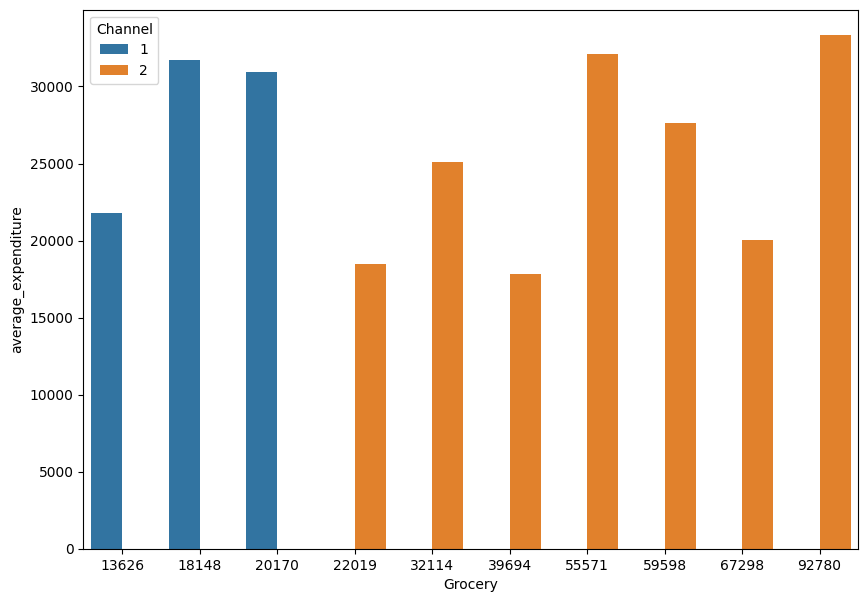

In [29]:
# Visualizing the top ten average expenditure.
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(
    data=sorted_df,
    x="Grocery",
    y="average_expenditure",
    hue="Channel",
    
)

##### 5. Which region appear more in the top ten?

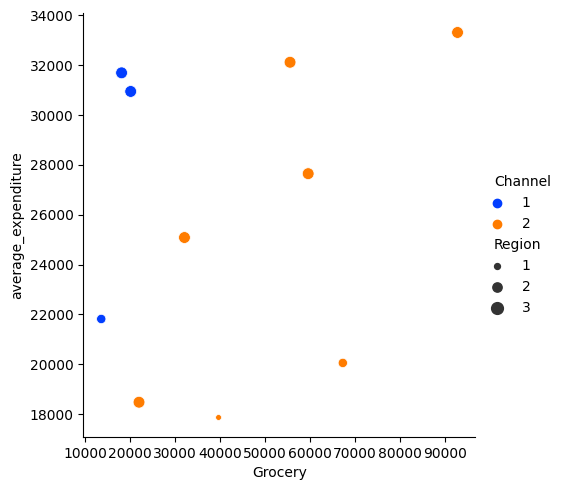

In [30]:
sns.relplot(
    data=sorted_df,
    x="Grocery",
    y="average_expenditure",
    hue="Channel",
    size="Region",
    palette="bright",
    
)
plt.show()

## ML Classification models (Predictive Analysis)

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [32]:
df.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,average_expenditure
0,2,3,12669,9656,7561,214,2674,1338,5685.333333
1,2,3,7057,9810,9568,1762,3293,1776,5544.333333


In [33]:
# creating and spliting data for training
X = df.drop(["Region", "Channel", "average_expenditure"], axis=1)
y = df["Channel"]

In [34]:
# Splitting the data sets into training and testing data.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=10
)

In [35]:
# Predicting with several classification models to find out the model that predicts with the higest accuracy

##### KNN

In [36]:
#importing model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [37]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model = knn_model.fit(X_train, y_train) # fitting the model with the KNN

In [38]:
y_pred = knn_model.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.84      0.93      0.88        56
           2       0.85      0.69      0.76        32

    accuracy                           0.84        88
   macro avg       0.84      0.81      0.82        88
weighted avg       0.84      0.84      0.84        88



##### Naive Bayes 

In [40]:
# importing model
from sklearn.naive_bayes import GaussianNB

In [41]:
nayes_model = GaussianNB()
nayes_model = nayes_model.fit(X_train, y_train)

In [42]:
y_pred = nayes_model.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.92      0.96      0.94        56
           2       0.93      0.84      0.89        32

    accuracy                           0.92        88
   macro avg       0.92      0.90      0.91        88
weighted avg       0.92      0.92      0.92        88



##### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logis_r_model = LogisticRegression()
logis_r_model = logis_r_model.fit(X_train, y_train)

In [46]:
y_pred = logis_r_model.predict(X_test)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.91      0.95      0.93        56
           2       0.90      0.84      0.87        32

    accuracy                           0.91        88
   macro avg       0.91      0.90      0.90        88
weighted avg       0.91      0.91      0.91        88



##### Support Vector Machine

In [48]:
from sklearn.svm import SVC

In [49]:
svc_model  = SVC()
svc_model = svc_model.fit(X_train, y_train)

In [50]:
y_pred = svc_model.predict(X_test)

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      0.96      0.92        56
           2       0.92      0.75      0.83        32

    accuracy                           0.89        88
   macro avg       0.90      0.86      0.87        88
weighted avg       0.89      0.89      0.88        88



##### Building a Neural Network

In [52]:
import tensorflow as tf

In [53]:
# creating the neural network (NN)
ann = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(18, activation="relu", input_shape=(6,)),
        tf.keras.layers.Dense(9, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)
ann.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss="binary_crossentropy", metrics="accuracy")

In [54]:
history = ann.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=10,
    validation_split=0.2,
    verbose=True
)

Epoch 1/100
29/29 [==============================] - 1s 7ms/step - loss: 1098.8309 - accuracy: 0.3274 - val_loss: 181.1644 - val_accuracy: 0.6197
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 19.2268 - accuracy: 0.6014 - val_loss: -371.2259 - val_accuracy: 0.7183
Epoch 3/100
29/29 [==============================] - 0s 3ms/step - loss: -689.7748 - accuracy: 0.6655 - val_loss: -1009.1889 - val_accuracy: 0.7324
Epoch 4/100
29/29 [==============================] - 0s 3ms/step - loss: -1654.6494 - accuracy: 0.6762 - val_loss: -2008.5361 - val_accuracy: 0.7324
Epoch 5/100
29/29 [==============================] - 0s 3ms/step - loss: -3104.5889 - accuracy: 0.6762 - val_loss: -3371.5166 - val_accuracy: 0.7324
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: -5627.9258 - accuracy: 0.6762 - val_loss: -6571.0698 - val_accuracy: 0.7324
Epoch 7/100
29/29 [==============================] - 0s 3ms/step - loss: -10424.1992 - accuracy: 0.6762 - val_loss

29/29 [==============================] - 0s 4ms/step - loss: -11225239.0000 - accuracy: 0.6762 - val_loss: -9208309.0000 - val_accuracy: 0.7324
Epoch 55/100
29/29 [==============================] - 0s 3ms/step - loss: -11818599.0000 - accuracy: 0.6762 - val_loss: -9716116.0000 - val_accuracy: 0.7324
Epoch 56/100
29/29 [==============================] - 0s 2ms/step - loss: -12456484.0000 - accuracy: 0.6762 - val_loss: -10248673.0000 - val_accuracy: 0.7324
Epoch 57/100
29/29 [==============================] - 0s 2ms/step - loss: -13105229.0000 - accuracy: 0.6762 - val_loss: -10759712.0000 - val_accuracy: 0.7324
Epoch 58/100
29/29 [==============================] - 0s 2ms/step - loss: -13768792.0000 - accuracy: 0.6762 - val_loss: -11264439.0000 - val_accuracy: 0.7324
Epoch 59/100
29/29 [==============================] - 0s 3ms/step - loss: -14431662.0000 - accuracy: 0.6762 - val_loss: -11810749.0000 - val_accuracy: 0.7324
Epoch 60/100
29/29 [==============================] - 0s 3ms/step -

In [55]:
# plotting loss
def plot_loss(history):
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.xlabel("Epoch")
    plt.ylabel("Binary Crossentropy")
    plt.legend()
    plt.grid(True)
    plt.show()

In [56]:
def plot_accuracy(history):
    plt.plot(history.history["accuracy"], label="accuracy")
    plt.plot(history.history["val_accuracy"], label="val_accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

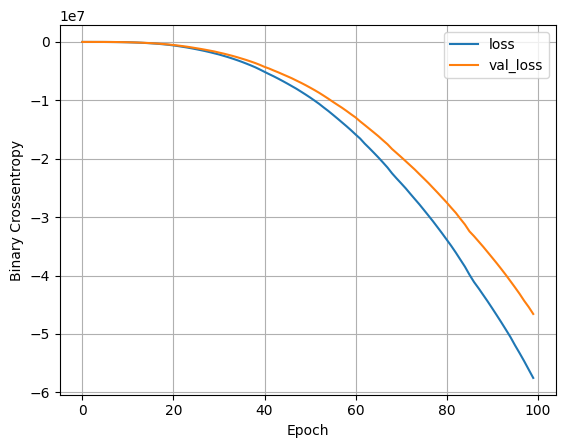

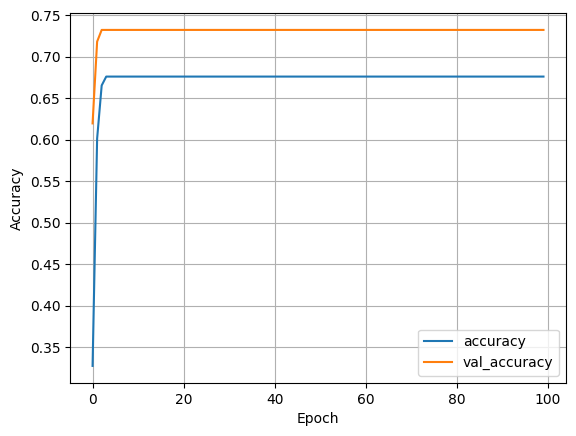

In [57]:
# plotting model loss and model accuracy
plot_loss(history)
plot_accuracy(history)

In [66]:
df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,average_expenditure
0,2,3,12669,9656,7561,214,2674,1338,5685.333333
1,2,3,7057,9810,9568,1762,3293,1776,5544.333333
2,2,3,6353,8808,7684,2405,3516,7844,6101.666667
3,1,3,13265,1196,4221,6404,507,1788,4563.500000
4,2,3,22615,5410,7198,3915,1777,5185,7683.333333
5,2,3,9413,8259,5126,666,1795,1451,4451.666667
6,2,3,12126,3199,6975,480,3140,545,4410.833333
7,2,3,7579,4956,9426,1669,3321,2566,4919.500000
8,1,3,5963,3648,6192,425,1716,750,3115.666667
9,2,3,6006,11093,18881,1159,7425,2098,7777.000000


In [60]:
# predicting the channel with the best classification model.(SVM)
# Prediction function
def channel_pred(fresh, milk, grocery, frozen, detergents_paper, delicassen):
    x = np.zeros(len(X.columns))
    x[0] = fresh
    x[1] = milk
    x[2] = grocery
    x[3] = frozen
    x[4] = detergents_paper
    x[5] = delicassen
    
    prediction = svc_model.predict([x])
    if prediction == 1:
        return "Clients Use HORECA"
    return "Clients Use  Retail Stores"

In [61]:
channel_pred(12669,9656,7561,214,2674,1338)

C:\Users\Chiemerie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


'Clients Use  Retail Stores'

In [62]:
#Exporting the prediction model to a pickle file
import pickle
import json

In [63]:
with open("client_data_model.pickle", "wb") as file:
    pickle.dump(svc_model, file)

In [64]:
cols = {
    "array_columns": [col.lower() for col in X.columns]
}
with open("array_columns.json", "w") as file:
    file.write(json.dumps(cols))